In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('data/features_target.csv')

# rename first column to 'date'
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# convert date column to datetime

df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
# set date as index
df.set_index('Date', inplace=True)
df

Date                             datetime64[ns]
SP500                                   float64
SP500 Log Returns                       float64
SP500 30 Day Volatility                 float64
SPX Put Call Ratio                      float64
SPX Put Volume                          float64
SPX Call Volume                         float64
Total SPX Options Volume                float64
VIX                                     float64
DJIA                                    float64
NASDAQ                                  float64
10Y_Treasury                            float64
High_Yield_Bonds                        float64
RUSSELL                                 float64
EMB_Yield                               float64
MSCI_World                              float64
Consumer_Sentiment                      float64
USD_Index                               float64
Gold                                    float64
Oil                                     float64
DJIA_log_returns                        

,SP500,SP500 Log Returns,SP500 30 Day Volatility,SPX Put Call Ratio,SPX Put Volume,SPX Call Volume,Total SPX Options Volume,VIX,DJIA,NASDAQ,...,NASDAQ_log_returns,RUSSELL_log_returns,MSCI_World_log_returns,USD_Index_log_returns,Gold_log_returns,Oil_log_returns,SP500_put_log_change,SP500_call_log_change,SP500_total_opts_log_change,Consumer_Sentiment_log_change
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,1070.25,0.009369,28.510976,1.12,280436.0,251021.0,531457.0,25.71,10138.99,2175.40,...,0.007350,0.013978,0.012148,0.000000,-0.002338,0.018862,-0.076998,-0.278034,-0.176999,0.000000
2010-07-09,1077.96,0.007178,28.462814,1.20,376805.0,315132.0,691937.0,24.98,10198.03,2196.45,...,0.009630,0.014660,0.006065,0.001550,0.011389,0.008183,0.295382,0.227455,0.263873,0.000000
2010-07-12,1078.75,0.000733,28.041079,1.49,421390.0,283127.0,704517.0,24.43,10216.27,2198.36,...,0.000869,-0.012502,0.000000,0.002974,-0.009217,-0.015231,0.111831,-0.107096,0.018018,0.000000
2010-07-13,1095.34,0.015262,28.157439,1.25,652349.0,519892.0,1172241.0,24.56,10363.02,2242.03,...,0.019670,0.033552,0.015906,-0.006673,0.012271,0.029327,0.437021,0.607726,0.509160,0.000000
2010-07-14,1095.17,-0.000155,28.338036,1.01,475499.0,469171.0,944670.0,24.89,10366.72,2249.84,...,0.003477,-0.004147,0.003690,-0.002514,-0.005371,-0.001816,-0.316215,-0.102654,-0.215837,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,2976.74,0.005035,47.065115,2.26,831789.0,368628.0,1200417.0,16.24,26916.83,7999.34,...,0.007492,0.001899,0.002066,0.002519,-0.022489,-0.033809,-0.428766,-0.404693,-0.421435,0.000000
2019-10-01,2940.25,-0.012334,46.781249,2.07,818005.0,395722.0,1213727.0,18.56,26573.04,7908.68,...,-0.011398,-0.019849,-0.009911,-0.002519,0.010872,-0.009100,-0.016710,0.070924,0.011027,0.024379
2019-10-02,2887.61,-0.018065,47.359805,1.82,1463102.0,804358.0,2267460.0,20.56,26078.62,7785.25,...,-0.015730,-0.009283,-0.017290,-0.001110,0.012613,-0.017503,0.581446,0.709332,0.624964,0.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-07-08 to 2019-10-04
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SP500                          2264 non-null   float64
 1   SP500 Log Returns              2264 non-null   float64
 2   SP500 30 Day Volatility        2264 non-null   float64
 3   SPX Put Call Ratio             2264 non-null   float64
 4   SPX Put Volume                 2264 non-null   float64
 5   SPX Call Volume                2264 non-null   float64
 6   Total SPX Options Volume       2264 non-null   float64
 7   VIX                            2264 non-null   float64
 8   DJIA                           2264 non-null   float64
 9   NASDAQ                         2264 non-null   float64
 10  10Y_Treasury                   2264 non-null   float64
 11  High_Yield_Bonds               2264 non-null   float64
 12  RUSSELL                       

In [19]:
from sklearn.preprocessing import StandardScaler

# name of the column to be predicted
target_column = 'SP500 30 Day Volatility'

# create a deep copy of the dataframe to avoid modifying original data
df_copy = df.copy()

# target data
target_data = df_copy[target_column]

# features data (all columns except the target)
features_data = df_copy.drop(target_column, axis=1)

# create the scaler
scaler = StandardScaler()

# fit and transform the feature data
scaled_features = scaler.fit_transform(features_data)

# convert scaled features to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_data.columns, index=features_data.index)

# recombine target data with scaled feature data
scaled_df = pd.concat([scaled_features_df, target_data], axis=1)

scaled_df


,SP500,SP500 Log Returns,SPX Put Call Ratio,SPX Put Volume,SPX Call Volume,Total SPX Options Volume,VIX,DJIA,NASDAQ,10Y_Treasury,...,RUSSELL_log_returns,MSCI_World_log_returns,USD_Index_log_returns,Gold_log_returns,Oil_log_returns,SP500_put_log_change,SP500_call_log_change,SP500_total_opts_log_change,Consumer_Sentiment_log_change,SP500 30 Day Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,-1.649886,0.970416,-1.621603,-1.338845,-0.770885,-1.175804,1.704190,-1.574861,-1.472616,1.375817,...,1.110721,1.433558,-0.016089,-0.242153,0.892491,-0.251892,-0.780930,-0.582977,-0.015383,28.510976
2010-07-09,-1.635883,0.731915,-1.413679,-0.969458,-0.365071,-0.775245,1.568216,-1.562618,-1.460711,1.449356,...,1.166453,0.697016,0.327025,1.119624,0.391138,0.957921,0.638239,0.866111,-0.015383,28.462814
2010-07-12,-1.634449,0.030153,-0.659956,-0.798561,-0.567658,-0.743846,1.465770,-1.558835,-1.459631,1.428928,...,-1.054810,-0.037323,0.642255,-0.924601,-0.708032,0.361587,-0.301019,0.058018,-0.015383,28.041079
2010-07-13,-1.604318,1.612043,-1.283727,0.086716,0.931032,0.423594,1.489985,-1.528402,-1.434933,1.567835,...,2.711441,1.888504,-1.493510,1.207154,1.383760,1.418086,1.705856,1.672340,-0.015383,28.157439
2010-07-14,-1.604627,-0.066508,-1.907498,-0.591159,0.609975,-0.144424,1.551452,-1.527635,-1.430516,1.437099,...,-0.371528,0.409473,-0.572674,-0.543000,-0.078258,-1.029076,-0.288547,-0.710632,-0.015383,28.338036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,1.812675,0.498574,1.341310,0.774519,-0.026449,0.493921,-0.059745,1.904501,1.821126,-1.371684,...,0.122873,0.212865,0.541568,-2.241244,-1.580186,-1.394739,-1.136527,-1.386406,-0.015383,47.065115
2019-10-01,1.746402,-1.392502,0.847491,0.721684,0.145053,0.527143,0.372391,1.833206,1.769853,-1.435010,...,-1.655706,-1.237357,-0.573747,1.068307,-0.420218,-0.056026,0.198775,0.035040,2.463161,46.781249
2019-10-02,1.650798,-2.016505,0.197730,3.194374,2.731663,3.157261,0.744922,1.730674,1.700047,-1.533062,...,-0.791616,-2.130761,-0.261905,1.241091,-0.814690,1.887302,1.991119,2.052974,-0.015383,47.359805


In [20]:
# save the scaled data

scaled_df.to_csv('data/scaled_features_target.csv')

In [21]:
# create a function to create feature tensors from the data

def create_dataset(dataset, look_back=100, predict_ahead=30, target_col_index=-1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - predict_ahead):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back + predict_ahead, target_col_index])
    return np.array(X), np.array(Y)

In [22]:
lookback = 100
predict_ahead = 30

X, Y = create_dataset(scaled_df.values, lookback, predict_ahead, -1)
X.shape

(2134, 100, 30)

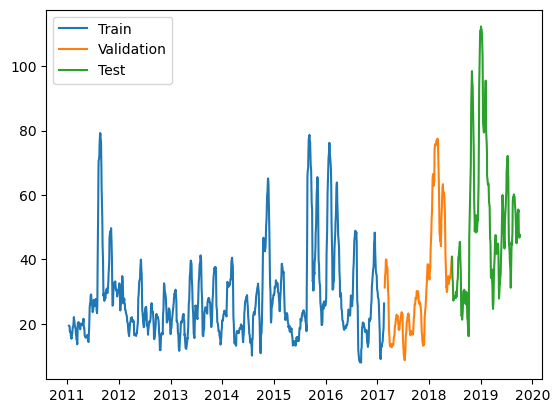

In [23]:
# split data into train, validation and test sets

train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
Y_train, Y_val, Y_test = Y[:train_size], Y[train_size:train_size + val_size], Y[train_size + val_size:]

# plot line graph of the SP500 30 day volatility

# shift correction for lookback and predict_ahead
shift = lookback+predict_ahead

plt.plot(df.index[shift:shift+train_size], Y_train)
plt.plot(df.index[shift + train_size:shift + train_size + val_size], Y_val)
plt.plot(df.index[shift + train_size + val_size:], Y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((100, 30)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=7)

Epoch 1/7
47/47 [==============================] - 3s 35ms/step - loss: 531.9713 - mean_absolute_error: 18.2327 - val_loss: 393.1838 - val_mean_absolute_error: 14.6856
Epoch 2/7
47/47 [==============================] - 1s 29ms/step - loss: 182.7668 - mean_absolute_error: 9.9776 - val_loss: 351.0097 - val_mean_absolute_error: 13.8351
Epoch 3/7
47/47 [==============================] - 1s 28ms/step - loss: 169.3415 - mean_absolute_error: 9.3790 - val_loss: 334.9696 - val_mean_absolute_error: 13.1968
Epoch 4/7
47/47 [==============================] - 1s 28ms/step - loss: 153.8346 - mean_absolute_error: 8.8527 - val_loss: 330.0843 - val_mean_absolute_error: 13.0590
Epoch 5/7
47/47 [==============================] - 1s 28ms/step - loss: 135.8282 - mean_absolute_error: 8.4705 - val_loss: 398.4413 - val_mean_absolute_error: 15.0708
Epoch 6/7
47/47 [==============================] - 1s 28ms/step - loss: 113.5599 - mean_absolute_error: 7.7613 - val_loss: 437.1895 - val_mean_absolute_error: 15.99

47/47 [==============================] - 1s 11ms/step


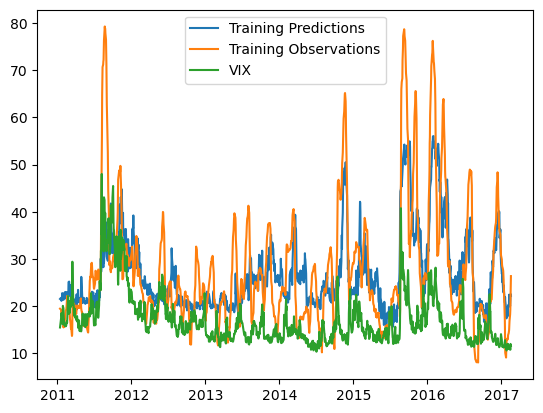

In [25]:
train_predictions = model.predict(X_train).flatten()

plt.plot(df.index[shift:shift+train_size], train_predictions)
plt.plot(df.index[shift:shift+train_size], Y_train)
plt.plot(df.index[shift:shift+train_size], df['VIX'][shift:shift+train_size])
plt.legend(['Training Predictions', 'Training Observations', 'VIX'])

10/10 [==============================] - 0s 11ms/step


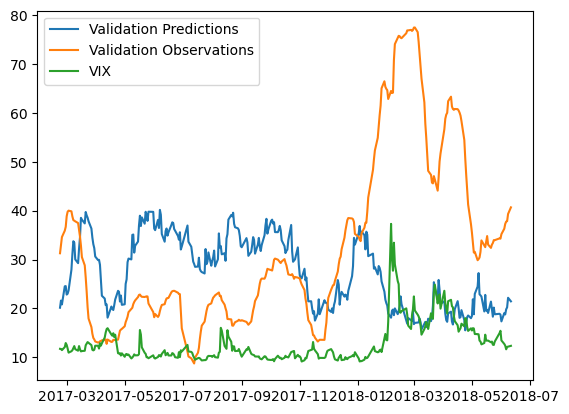

In [26]:
val_predictions = model.predict(X_val).flatten()

plt.plot(df.index[shift + train_size:shift + train_size + val_size], val_predictions)
plt.plot(df.index[shift + train_size:shift + train_size + val_size], Y_val)
plt.plot(df.index[shift + train_size:shift + train_size + val_size], df['VIX'][shift + train_size:shift + train_size + val_size])

plt.legend(['Validation Predictions', 'Validation Observations', 'VIX'])

11/11 [==============================] - 0s 10ms/step


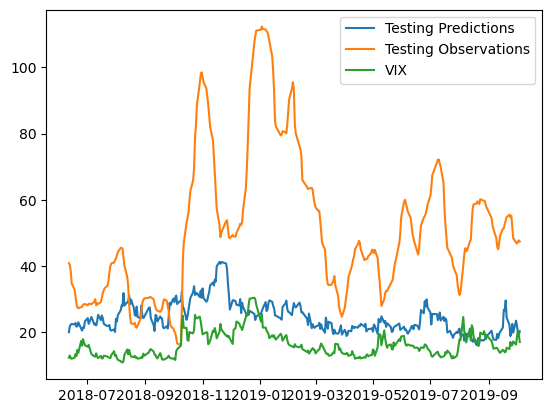

In [27]:
test_predictions = model.predict(X_test).flatten()

plt.plot(df.index[shift + train_size + val_size:], test_predictions)
plt.plot(df.index[shift + train_size + val_size:], Y_test)
plt.plot(df.index[shift + train_size + val_size:], df['VIX'][shift + train_size + val_size:])
plt.legend(['Testing Predictions', 'Testing Observations', 'VIX'])

In [28]:
# print the mean absolute error of the predictions and VIX

from sklearn.metrics import mean_absolute_error

print('Training MAE - LSTM:', round(mean_absolute_error(Y_train, train_predictions),3), 'VIX:', round(mean_absolute_error(Y_train, df['VIX'][shift:shift+train_size]),2))
print('Validation MAE - LSTM:',round(mean_absolute_error(Y_val, val_predictions),2), 'VIX:', round(mean_absolute_error(Y_val, df['VIX'][shift + train_size:shift + train_size + val_size]),2))
print('Testing MAE - LSTM:', round(mean_absolute_error(Y_test, test_predictions),2), 'VIX:', round(mean_absolute_error(Y_test, df['VIX'][shift + train_size + val_size:]),2))


Training MAE - LSTM: 6.59 VIX: 11.34
Validation MAE - LSTM: 17.64 VIX: 19.67
Testing MAE - LSTM: 27.18 VIX: 34.5


The LSTM model seems to oupterform the VIX on the training, validation and test set w.r.t the MAE for the respective time frames.

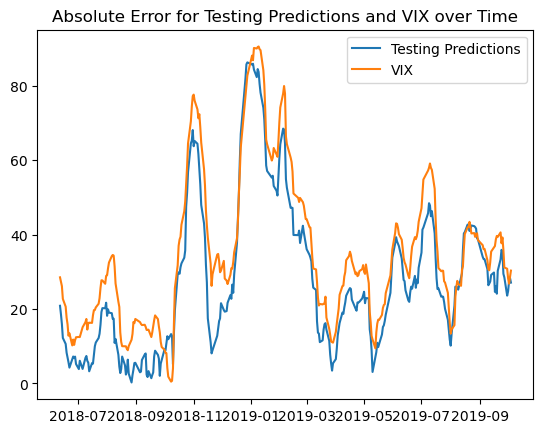

In [29]:
# plot difference between predictions and observations

plt.plot(df.index[shift + train_size + val_size:], abs(test_predictions - Y_test))
plt.plot(df.index[shift + train_size + val_size:], abs(df['VIX'][shift + train_size + val_size:] - Y_test))
plt.legend(['Testing Predictions', 'VIX'])
plt.title('Absolute Error for Testing Predictions and VIX over Time');

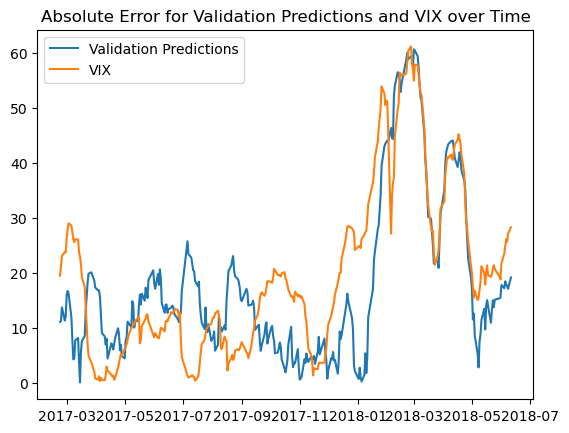

In [30]:
# do the same for validation data

plt.plot(df.index[shift + train_size:shift + train_size + val_size], abs(val_predictions - Y_val))
plt.plot(df.index[shift + train_size:shift + train_size + val_size], abs(df['VIX'][shift + train_size:shift + train_size + val_size] - Y_val))
plt.legend(['Validation Predictions', 'VIX'])
plt.title('Absolute Error for Validation Predictions and VIX over Time');